# Clustering
You should build an end-to-end machine learning pipeline using a clustering model. In particular, you should do the following:
- Load the `customers` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Choose a few clustering algorithms, such as [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [hdbscan](https://hdbscan.readthedocs.io/en/latest/), and [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).
- Train and evaluate clustering models (i.e., the clustering algorithm and its hyperparameters) to find out the best-performing model using clustering evaluation metrics, such as [elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) and the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import hdbscan
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [125]:
df = pd.read_csv("customers.csv")

In [126]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [127]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [128]:
df.isna().sum()

,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [129]:
df.drop(columns=["ID"], inplace=True, errors='ignore')

In [130]:
scaler = StandardScaler()
df[["Age", "Income"]] = scaler.fit_transform(df[["Age", "Income"]])

df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,2.653614,2,0.097524,1,2
1,1,1,-1.187132,1,0.782654,1,2
2,0,0,1.117316,1,-0.833202,0,0
3,0,0,0.775916,1,1.328386,1,1
4,0,0,1.458716,1,0.736932,1,1


<Axes: xlabel='Age'>

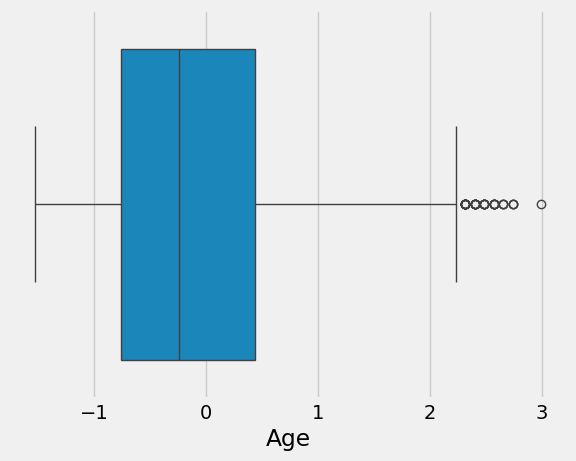

In [141]:
sns.boxplot(x=df["Age"])

<Axes: xlabel='Income'>

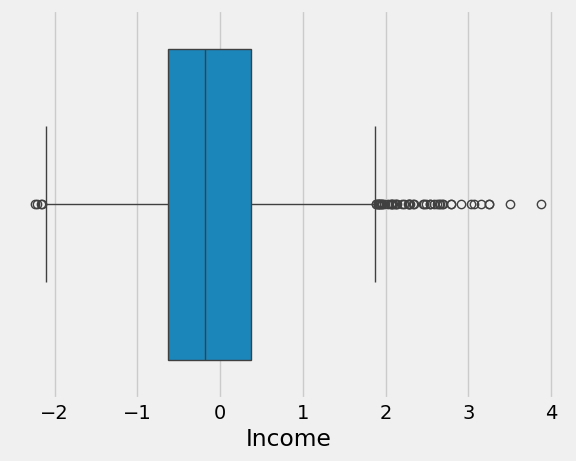

In [142]:
sns.boxplot(x=df["Income"])

In [131]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df)
df = df[outliers == 1]  # Remove outliers

In [132]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [133]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [134]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

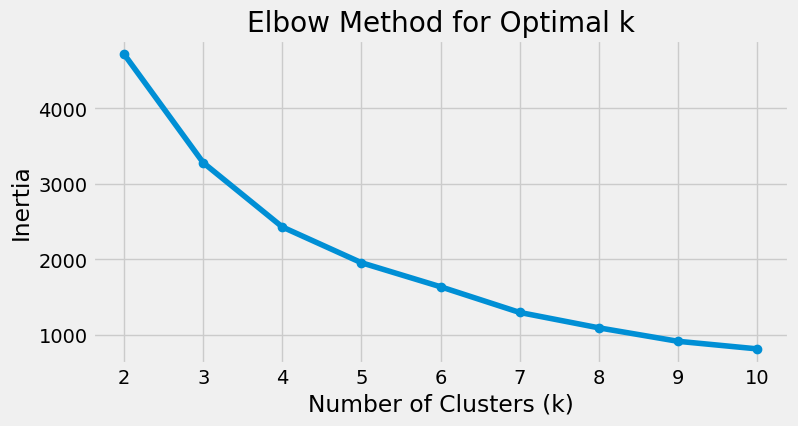

In [135]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [136]:
optimal_k = 4  # Adjust based on elbow plot

In [137]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_pca)
silhouette = silhouette_score(df_pca, kmeans_labels)
print(f"Silhouette Score: {silhouette:.4f}")

df["Cluster"] = kmeans_labels

Silhouette Score: 0.4182


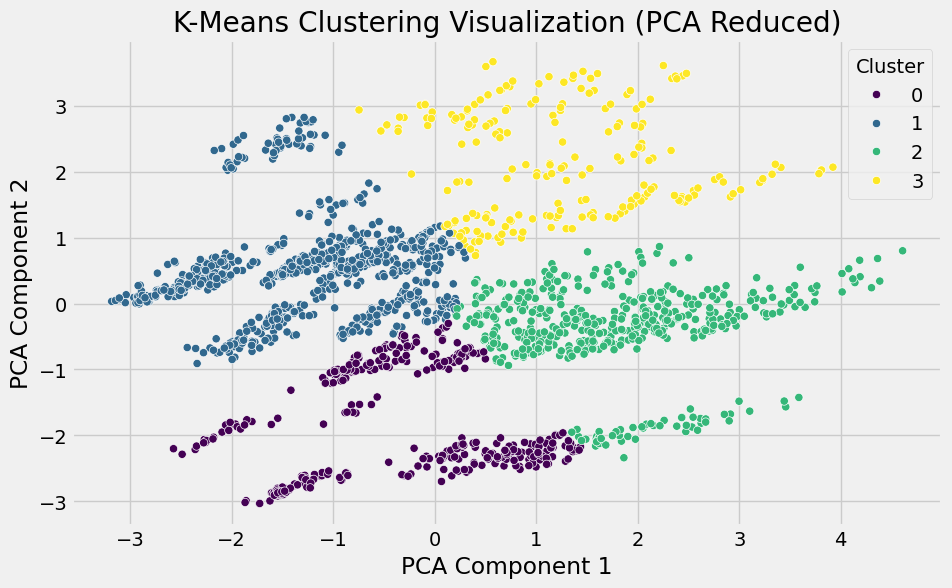

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.legend(title="Cluster")
plt.show()

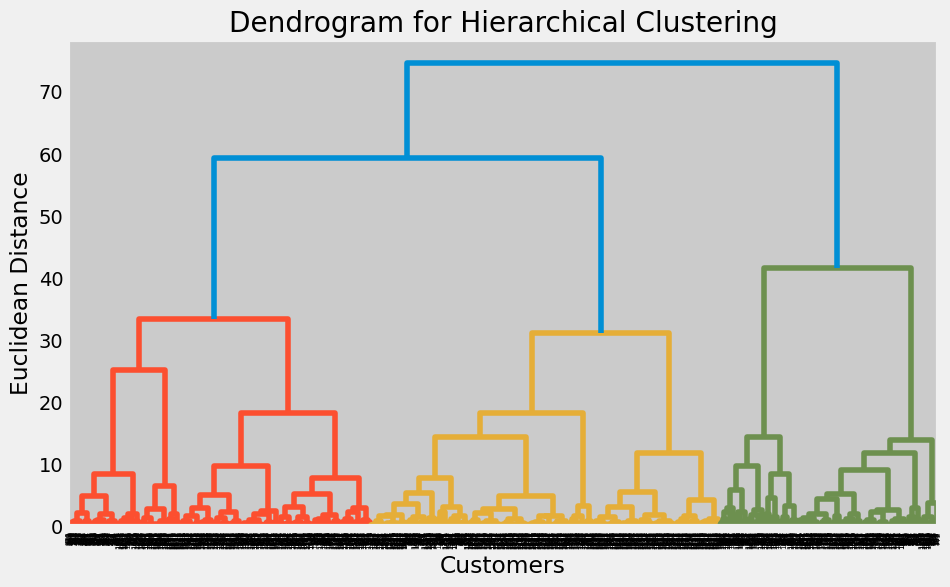

In [139]:
plt.figure(figsize=(10, 6))
linked = linkage(df_pca, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [140]:
print("Cluster Statistics:")
print(df.groupby("Cluster").mean())

Cluster Statistics:
              Sex  Marital status       Age  Education    Income  Occupation  \
Cluster                                                                        
0        0.087193        0.002725 -0.359680   0.381471 -0.569445    0.446866   
1        0.860976        0.830488 -0.441257   1.091463 -0.502480    0.532927   
2        0.011905        0.180556  0.184902   0.894841  0.575019    1.269841   
3        0.588517        0.751196  1.127934   1.799043  0.717324    1.177033   

         Settlement size  
Cluster                   
0               0.384196  
1               0.307317  
2               1.412698  
3               1.220096  
